In [98]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math

In [2]:
train_data= pd.read_csv('boston_train.csv')
train_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
x_train= train_data.drop('medv', axis= 1)
y_train= train_data['medv']

# Here I am about to determine the best suitable model and parameters 

In [15]:
reg= SVR(C= 10)
scores= cross_val_score(reg, x_train, y_train, cv= 5, scoring= 'neg_mean_squared_error')

In [16]:
print (scores.mean())
print (scores.std())

-96.339031012
51.3670720365


In [8]:
train_data['medv'].mean()

22.76876876876877

In [17]:
scale= StandardScaler()
scale.fit(x_train)
x_train_scaled= scale.transform(x_train)

In [83]:
reg= SVR(C= 20)
scores= cross_val_score(reg, x_train_scaled, y_train, cv= 5, scoring= 'neg_mean_squared_error')

In [84]:
scores.mean(), scores.std()

(-35.631526629368174, 21.259757206848853)

In [93]:
reg= RandomForestRegressor()
scores= cross_val_score(reg, x_train, y_train, cv= 5, scoring= 'neg_mean_squared_error')

In [94]:
scores.mean(), scores.std()

(-33.43918090004523, 27.764560528604555)

# Let's visualize the complexity of the data 

In [51]:
pca= PCA(n_components= 2)
pca.fit(x_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
projection= pca.transform(x_train_scaled)

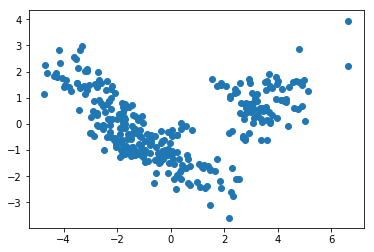

In [57]:
plt.scatter(projection[:,0], projection[:,1])
plt.show()

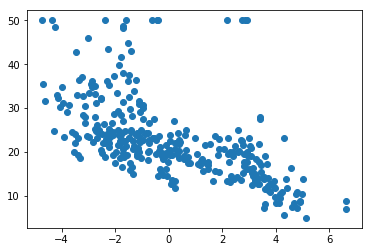

In [62]:
plt.scatter(projection[:,0], y_train)
plt.show()

In [65]:
from mpl_toolkits.mplot3d import axes3d 

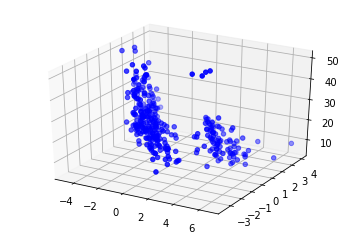

In [72]:
fig= plt.figure()
ax= fig.add_subplot(111, projection= '3d')
ax.scatter(projection[:,0], projection[:,1], y_train, color= 'blue')
plt.show()

# From the above plots it appears that embedded pattern in the data is not very complex, however the dataset contains a lot of noisy data points; hence the model must be regularized properly.

# By now it's clear Random Forest will perform much better as compared to SVM 

In [107]:
# Model Tuning
reg= RandomForestRegressor(n_estimators= 15)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error with 15 estimators: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error with 15 estimators: 5.26 +/- 34.34


In [109]:
reg= RandomForestRegressor(n_estimators= 10)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error with 15 estimators: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error with 15 estimators: 5.74 +/- 39.03


In [113]:
reg= RandomForestRegressor(n_estimators= 15, max_depth= 5)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error with 15 estimators: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error with 15 estimators: 4.92 +/- 28.96


In [115]:
reg= RandomForestRegressor(n_estimators= 10, max_depth= 5)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error with 15 estimators: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error with 15 estimators: 5.10 +/- 30.44


In [117]:
reg= RandomForestRegressor(n_estimators= 15, max_depth= 3)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error with 15 estimators: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error with 15 estimators: 5.14 +/- 28.06


In [123]:
reg= RandomForestRegressor(n_estimators= 15, max_depth= 7)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error with 15 estimators: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error with 15 estimators: 4.99 +/- 28.64


# After performing several trail and Errors, for acheaving a robust and accurate model, I am choosing hyperperameters n_estimators= 15 and max_depth= 5

# How Ever Random Forests are scale invariant models, but still let's have a look it there is any influence of scaled features

In [127]:
reg= RandomForestRegressor(n_estimators= 15, max_depth= 5)
scores= cross_val_score(reg, x_train_scaled, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error with 15 estimators: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error with 15 estimators: 4.95 +/- 29.03


# no significant improvement

In [134]:
# Lastly let's also verify if shuffling the data has any form of influence over the accuracy of model
train_data= train_data.sample(frac= 1)
x_train, y_train= train_data.drop('medv', axis= 1), train_data['medv']

reg= RandomForestRegressor(n_estimators= 15, max_depth= 5)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error: 3.58 +/- 4.19


# There's a substatial improvement in the accuracy of prediction by shuffling the data

In [140]:
model= RandomForestRegressor(n_estimators= 10, max_depth= 5)
reg= AdaBoostRegressor(model, n_estimators= 25)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error: 3.12 +/- 3.77


In [141]:
model= RandomForestRegressor(n_estimators= 10, max_depth= 5)
reg= AdaBoostRegressor(model, n_estimators= 30)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error: 3.02 +/- 3.06


In [143]:
model= RandomForestRegressor(n_estimators= 10, max_depth= 5)
reg= AdaBoostRegressor(model, n_estimators= 40)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error: 3.05 +/- 3.40


In [144]:
model= RandomForestRegressor(n_estimators= 15, max_depth= 5)
reg= AdaBoostRegressor(model, n_estimators= 25)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error: 3.11 +/- 3.64


In [145]:
model= RandomForestRegressor(n_estimators= 5, max_depth= 5)
reg= AdaBoostRegressor(model, n_estimators= 25)
scores= cross_val_score(reg, x_train, y_train, cv= 10, scoring= 'neg_mean_squared_error')
print ('Mean_Error: %.2f +/- %.2f' %(math.sqrt(-scores.mean()), scores.std()))

Mean_Error: 3.19 +/- 4.61


# Boosting the random forest (with params n_estimators= 10, max_depth= 5) with 30 estimators resulted in improvement